#### $\text{Q2: Gaussian Elimination and Partial Pivoting}$

In [65]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as npla
import scipy.linalg as spla

In [66]:
def init_equation(k):
    '''
    returns A,b as mentioned in the equation
    in the assignment
    '''
    epsilon = np.power(10.0,-2*k)
    A = np.array([[epsilon,1],[1,1]])
    b = np.array([1+epsilon,2])
    return A,b

In [67]:
def Gaussian_LU_naive(A):
    '''
    returns LU factorization of A 
    without partial pivoting
    
    Reference: 
    Classics in Applied Mathematics
    Michael  T. Heath
    '''
    dim = A.shape
    n = dim[0]
    
    L = np.identity(n)
    U = A
    
    for i in range(n):
        M = np.identity(n)
        Op = np.identity(n)
        if U[i,i] != 0:
            M[i+1:, i] = U[i+1:,i] / U[i,i]
            Op[i+1:, i] = -M[i+1:, i]
            U = np.matmul(Op,U)
            L = np.matmul(L,M)
    
    return L,U

In [68]:
def solve(L,U,b):
    '''
    uses forward solve and backward solve
    to find solutions for the equation
    LUx = b
    
    Forward Solves for the Equation
    Ly = b
    
    Backward Solves for the Equation
    Ux = y
    '''
    y = spla.solve_triangular(L,b,lower=True)
    x = spla.solve_triangular(U,y)
    return x

In [69]:
def approximate_solution(H,b):
    '''
    approximate solution for equation Hx = b
    
    P,L,U -> LU factorization of H with permutation matrix P
    
    Hx = b
    -> PLUx = b
    -> LUx = P.T*b (P.T = P^(-1)) 
    
    Forward Solve for Ly = P.T*b
    Backward Solve for Ux = y
    
    returns: x
    '''
    P,L,U = spla.lu(H)
    Pb = P.T@b
    y = spla.solve_triangular(L,Pb,lower=True)
    x = spla.solve_triangular(U,y,lower=False)
    return x

In [73]:
absolute_errors = []
refined_errors = []
x = np.array([1,1])

for i in range(1,11):
    # absolute errors for without pivoting
    A,b = init_equation(i)
    L,U = Gaussian_LU_naive(A)
    x_cap = solve(L,U,b)
    error = x-x_cap
    error_norm = npla.norm(error)
    absolute_errors.append(error_norm)
    
    # Iterative Refinement
    x0 = approximate_solution(A,b)
    r0 = b-np.matmul(A,x0)
    s0 = spla.solve(A,r0)
    x1 = x0 + s0
    rError_norm = npla.norm(x1-x)
    refined_errors.append(rError_norm)

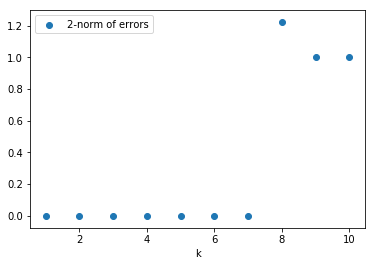

In [74]:
x_axis = np.arange(1,11,1)
plt.scatter(x_axis,absolute_errors,label='2-norm of errors')
plt.xlabel('k')
plt.legend(loc='upper left')
plt.show()

#### $\text{Q2(a):}$
$\text{As we can infer from the plot, the solution is almost accurate till } \epsilon = 10^{-14}$
$\text{The error increases at }\epsilon = 10^{-16} \approx \epsilon_{mach} \text{ and then becomes almost constant for } \epsilon = 10^{-18}, 10^{-20}.$

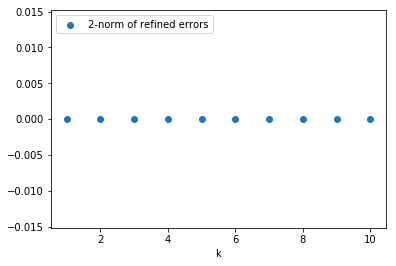

In [75]:
x_axis = np.arange(1,11,1)
plt.scatter(x_axis,refined_errors,label='2-norm of refined errors')
plt.xlabel('k')
plt.legend(loc='upper left')
plt.show()

#### $\text{Q2(b):}$
$\text{Upon, iterative refinement, the rise in error at } \epsilon = 10^{-16} \text{ is taken care of.}$
$\text{The solution remains almost accurate for all values of }\epsilon.$

$\text{Ashwin Singh}$
<br/>
$\text{2017222}$